In [356]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import word_tokenize, pos_tag, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk import text
from gensim.corpora import Dictionary
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [357]:
df = pd.read_csv("amazon-reviews.csv", encoding="latin-1")

In [358]:
df.head()
# Here we see that label_2 represents postive tweets, label_1 negative ones

,text,label
0,Stuning even for the non-gamer: This sound tr...,__label__2
1,The best soundtrack ever to anything.: I'm re...,__label__2
2,Amazing!: This soundtrack is my favorite musi...,__label__2
3,Excellent Soundtrack: I truly like this sound...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After H...",__label__2


<AxesSubplot:>

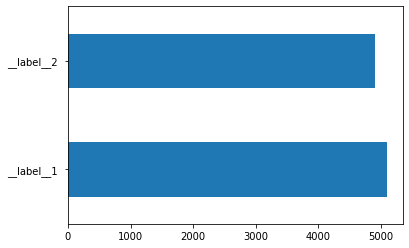

In [359]:
df.label.value_counts().plot(kind= 'barh')

In [360]:
data_cleaned = []
for data in df["text"]:
    data_cleaned.append(re.sub(r'[^\w\s]', ' ',re.sub(r"(?:\@|https?\://)\S+", "", data).lower()))

In [361]:
sentence = []
data_tokenized = []
for data in data_cleaned:
    for word in data.split():
        if word not in stopwords.words('english'):
            sentence.append(word)
    data_tokenized.append(sentence)
    sentence = []

In [362]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    return ''
    
lemmatizer = WordNetLemmatizer()

data_lemmatized = []
line_lemmatized = []

for line in data_tokenized:
    for i, word in enumerate(line):
        pos = get_wordnet_pos(pos_tag([word])[0][1])
        if pos != '':
            line_lemmatized.append(lemmatizer.lemmatize(word, pos))
        else:
            line_lemmatized.append(word)
    data_lemmatized.append(line_lemmatized)
    line_lemmatized = []
    break


In [363]:
df["text_tokenized"] = data_tokenized

In [364]:
corpus = []
for line in data_tokenized :
    for word in line :
        if word not in [' ',""]:
            corpus.append(word)
vocabulary = list(set(corpus))

In [365]:
"""vectorize = CountVectorizer()
vectors = vectorize.fit_transform(corpus)"""

'vectorize = CountVectorizer()\nvectors = vectorize.fit_transform(corpus)'

In [366]:
word_counts_per_msg = {unique_word: [0] * len(df['text']) for unique_word in vocabulary}

for index, msg in enumerate(data_tokenized):
   for word in msg:
      word_counts_per_msg[word][index] += 1

word_counts = pd.DataFrame(word_counts_per_msg)

In [367]:
X = word_counts
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [368]:
gnb = GaussianNB()
clf = gnb.fit(X_train, y_train)

y_pred = clf.predict(X_test)

: 